# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import deltas
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

## Get data

Pima Indian Diabetes: 768
Number of attribues: 8
Classes total: 500 - 268

Classes train: 100 - 20
Classes test:  400 - 248


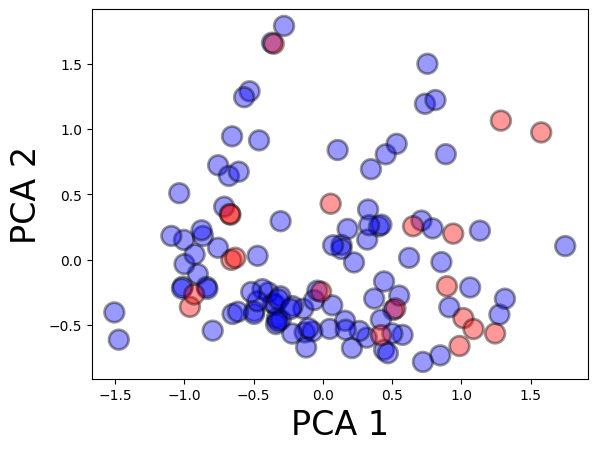

In [2]:
datasets = {0: 'Breast Cancer', 2: 'Iris', 3: 'Wine', 4: 'Pima Indian Diabetes', 
            5: 'Sonar Rocks vs Mines', 6: 'Banknote Authentication',
            7: 'Abalone Gender', 8: 'Ionosphere', 9: 'Wheat Seeds',
            10: 'Credit Scoring 1', 11: 'Credit Scoring 2', 
            12: 'Direct Marketing', 13: 'Habermans breast cancer'}
dataset = datasets[4]  # change ind to select dataset to use
model = 'SVM-rbf'

data_clf = data.get_real_dataset(dataset, scale=True)
deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

## Get Classifier

Tuning SVM params with 5 fold CV


Best SVM params: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Original


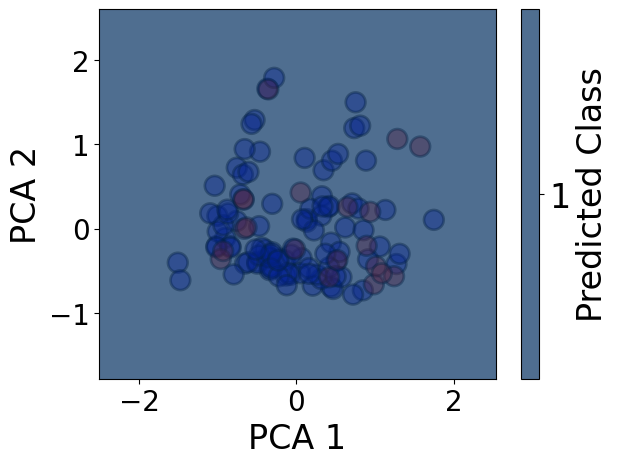

SMOTE


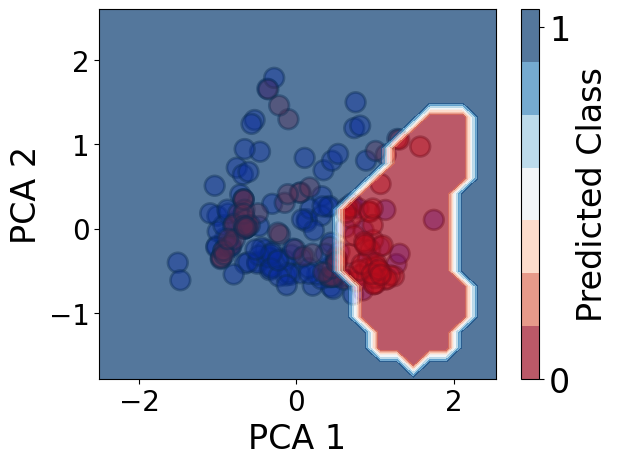

Balanced Weights


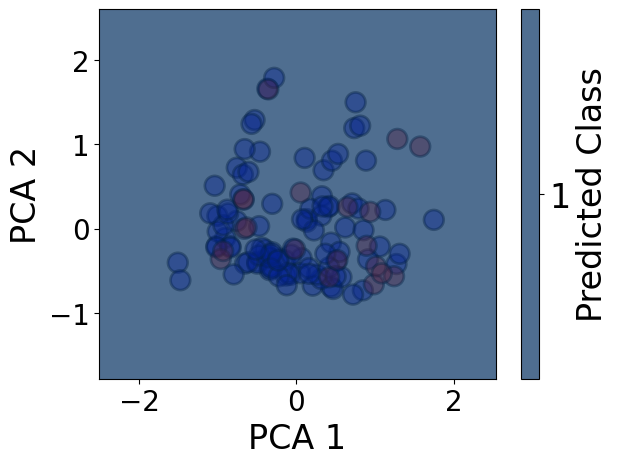

BMR


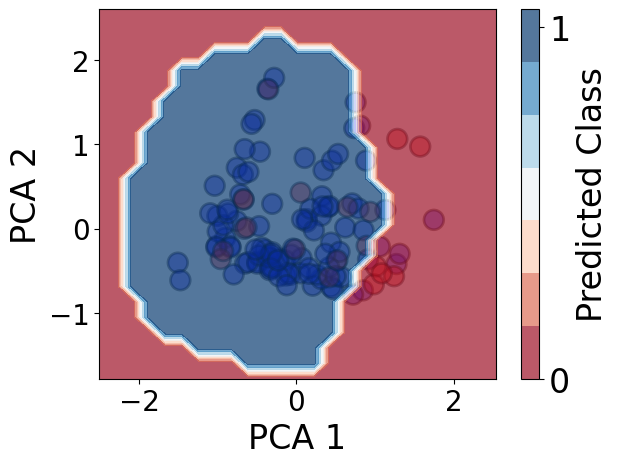

Threshold


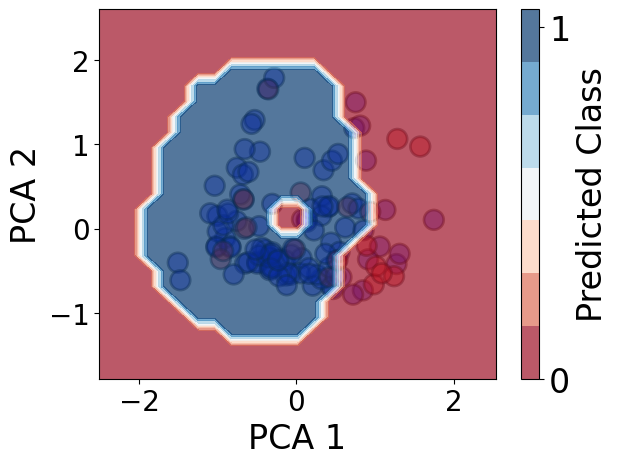

In [3]:
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)

data_clf['clf'] = classifiers_dict['Original']

## Fit deltas

Original Data


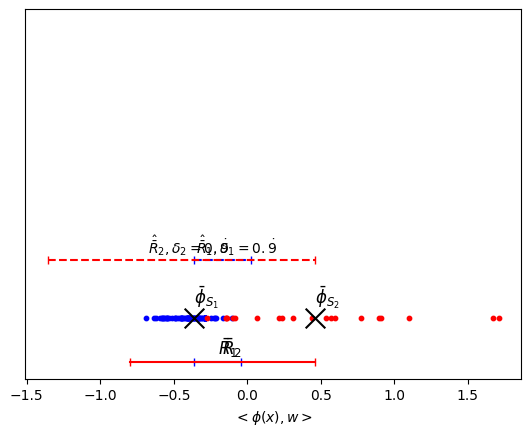

Budget 60 found 4 viable downsampled solutions
Best solution found by removing 50 data points
Downsampled Data:


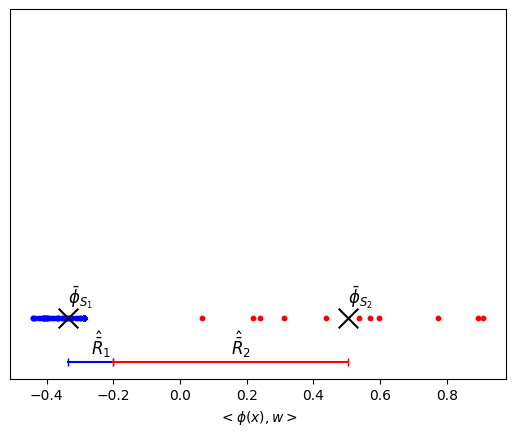

In [4]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                     method='supports-prop-update_mean',
                                                     max_trials=10000,
                                                     parallel=True)

## Plot training data information

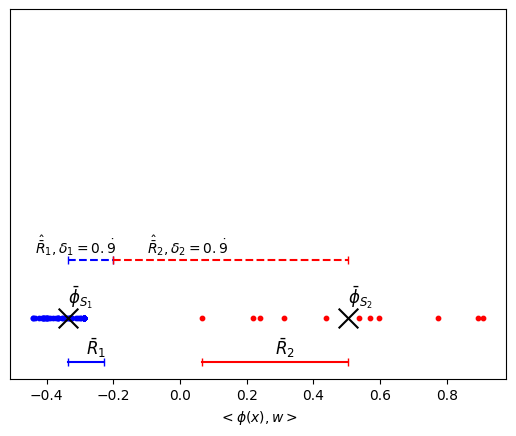

In [5]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [6]:
deltas_model.print_params()

Parameters
                R:  0.9104172348890088
                N1: 59
                N2: 11
                R1: 0.10698897162043325
                R2: 0.4395513378117727
                M:  0.29356530298030326
                D:  0.8401056124125093
                C1: 1
                C2: 1


# Evaluation on test data

                  Accuracy    G-Mean   ROC-AUC        F1
Method                                                  
Original          0.625000  0.178931  0.512379  0.061776
SMOTE             0.626543  0.486926  0.561129  0.366492
Balanced Weights  0.625000  0.178931  0.512379  0.061776
BMR               0.645062  0.630668  0.632823  0.555985
Threshold         0.618827  0.635350  0.645282  0.603531
Our Method        0.649691  0.653233  0.653427  0.593918 


Original


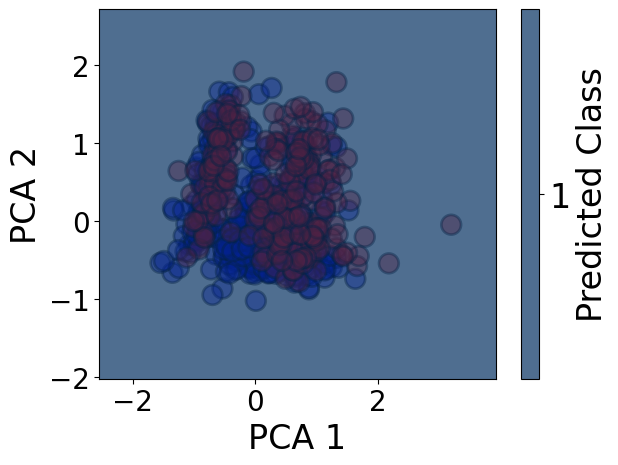

SMOTE


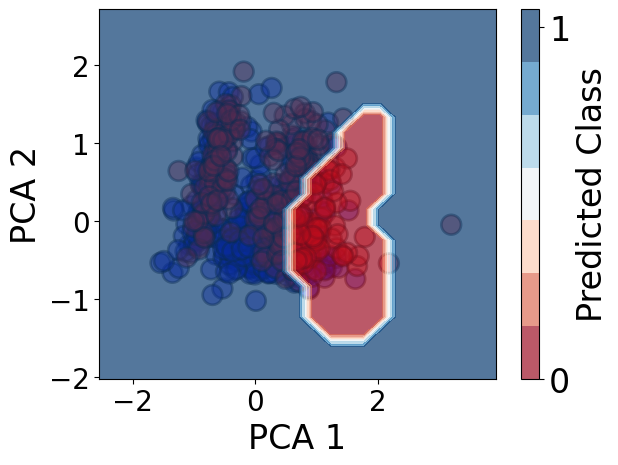

Balanced Weights


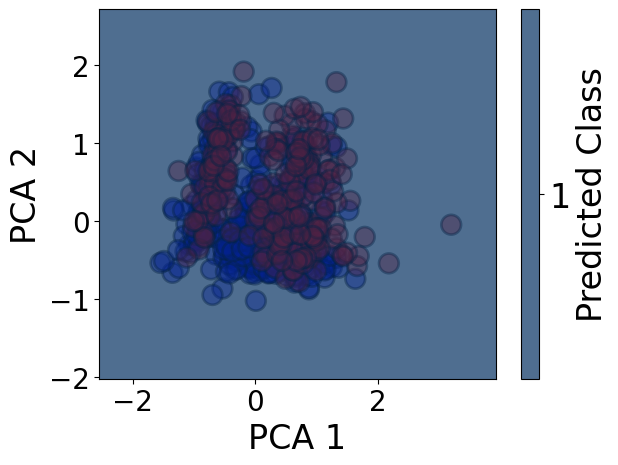

BMR


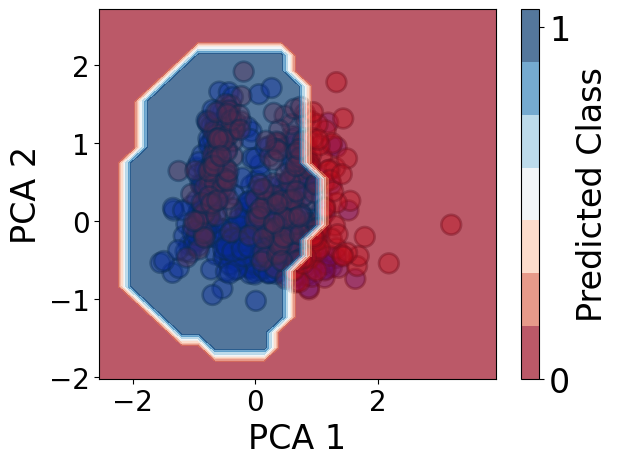

Threshold


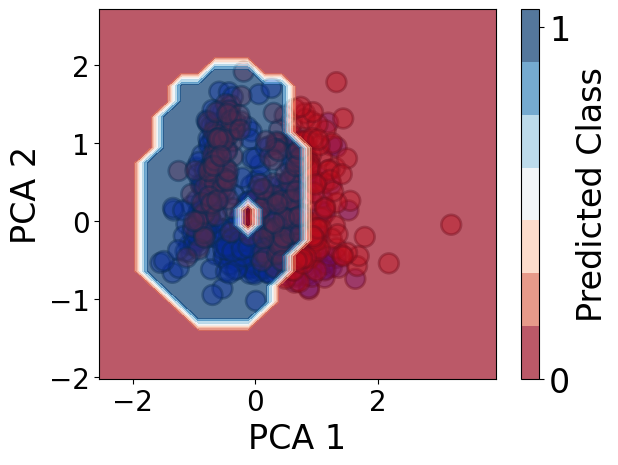

Our Method


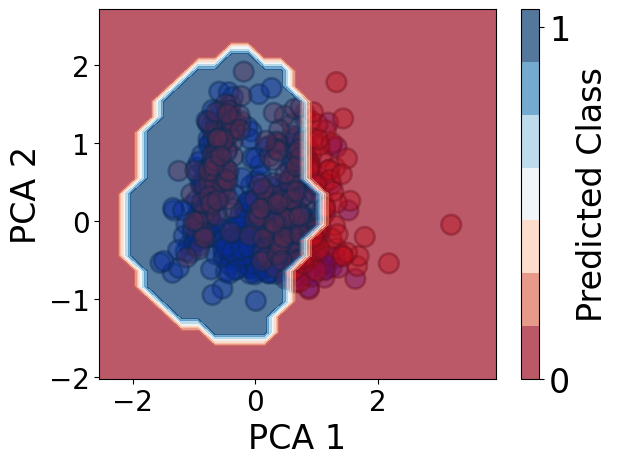

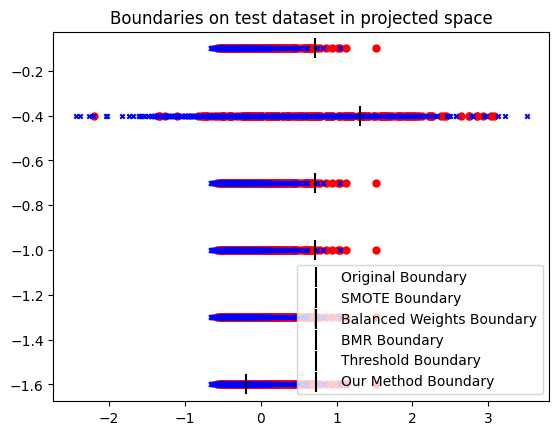

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Original & 0.6250 & 0.1789 & 0.5124 & 0.0618 \\
SMOTE & 0.6265 & 0.4869 & 0.5611 & 0.3665 \\
Balanced Weights & 0.6250 & 0.1789 & 0.5124 & 0.0618 \\
BMR & 0.6451 & 0.6307 & 0.6328 & 0.5560 \\
Threshold & 0.6188 & 0.6353 & 0.6453 & 0.6035 \\
Our Method & 0.6497 & 0.6532 & 0.6534 & 0.5939 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Original,0.625000,0.178931,0.512379,0.061776
SMOTE,0.626543,0.486926,0.561129,0.366492
Balanced Weights,0.625000,0.178931,0.512379,0.061776
BMR,0.645062,0.630668,0.632823,0.555985
Threshold,0.618827,0.635350,0.645282,0.603531
Our Method,0.649691,0.653233,0.653427,0.593918


In [7]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])